<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-18/miracle2_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1000, done.
remote: Counting objects: 100% (290/290), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 1000 (delta 182), reused 255 (delta 163), pack-reused 710
Receiving objects: 100% (1000/1000), 56.76 MiB | 7.29 MiB/s, done.
Resolving deltas: 100% (551/551), done.
Updating files: 100% (132/132), done.


'/content'

### 18-07-24 LiTaO3 Ycut gating

Gate voltage parameters :
- Amp : 1Vpp
- Offset : 500 mV
- Duty Cycle : 75% and then 10%



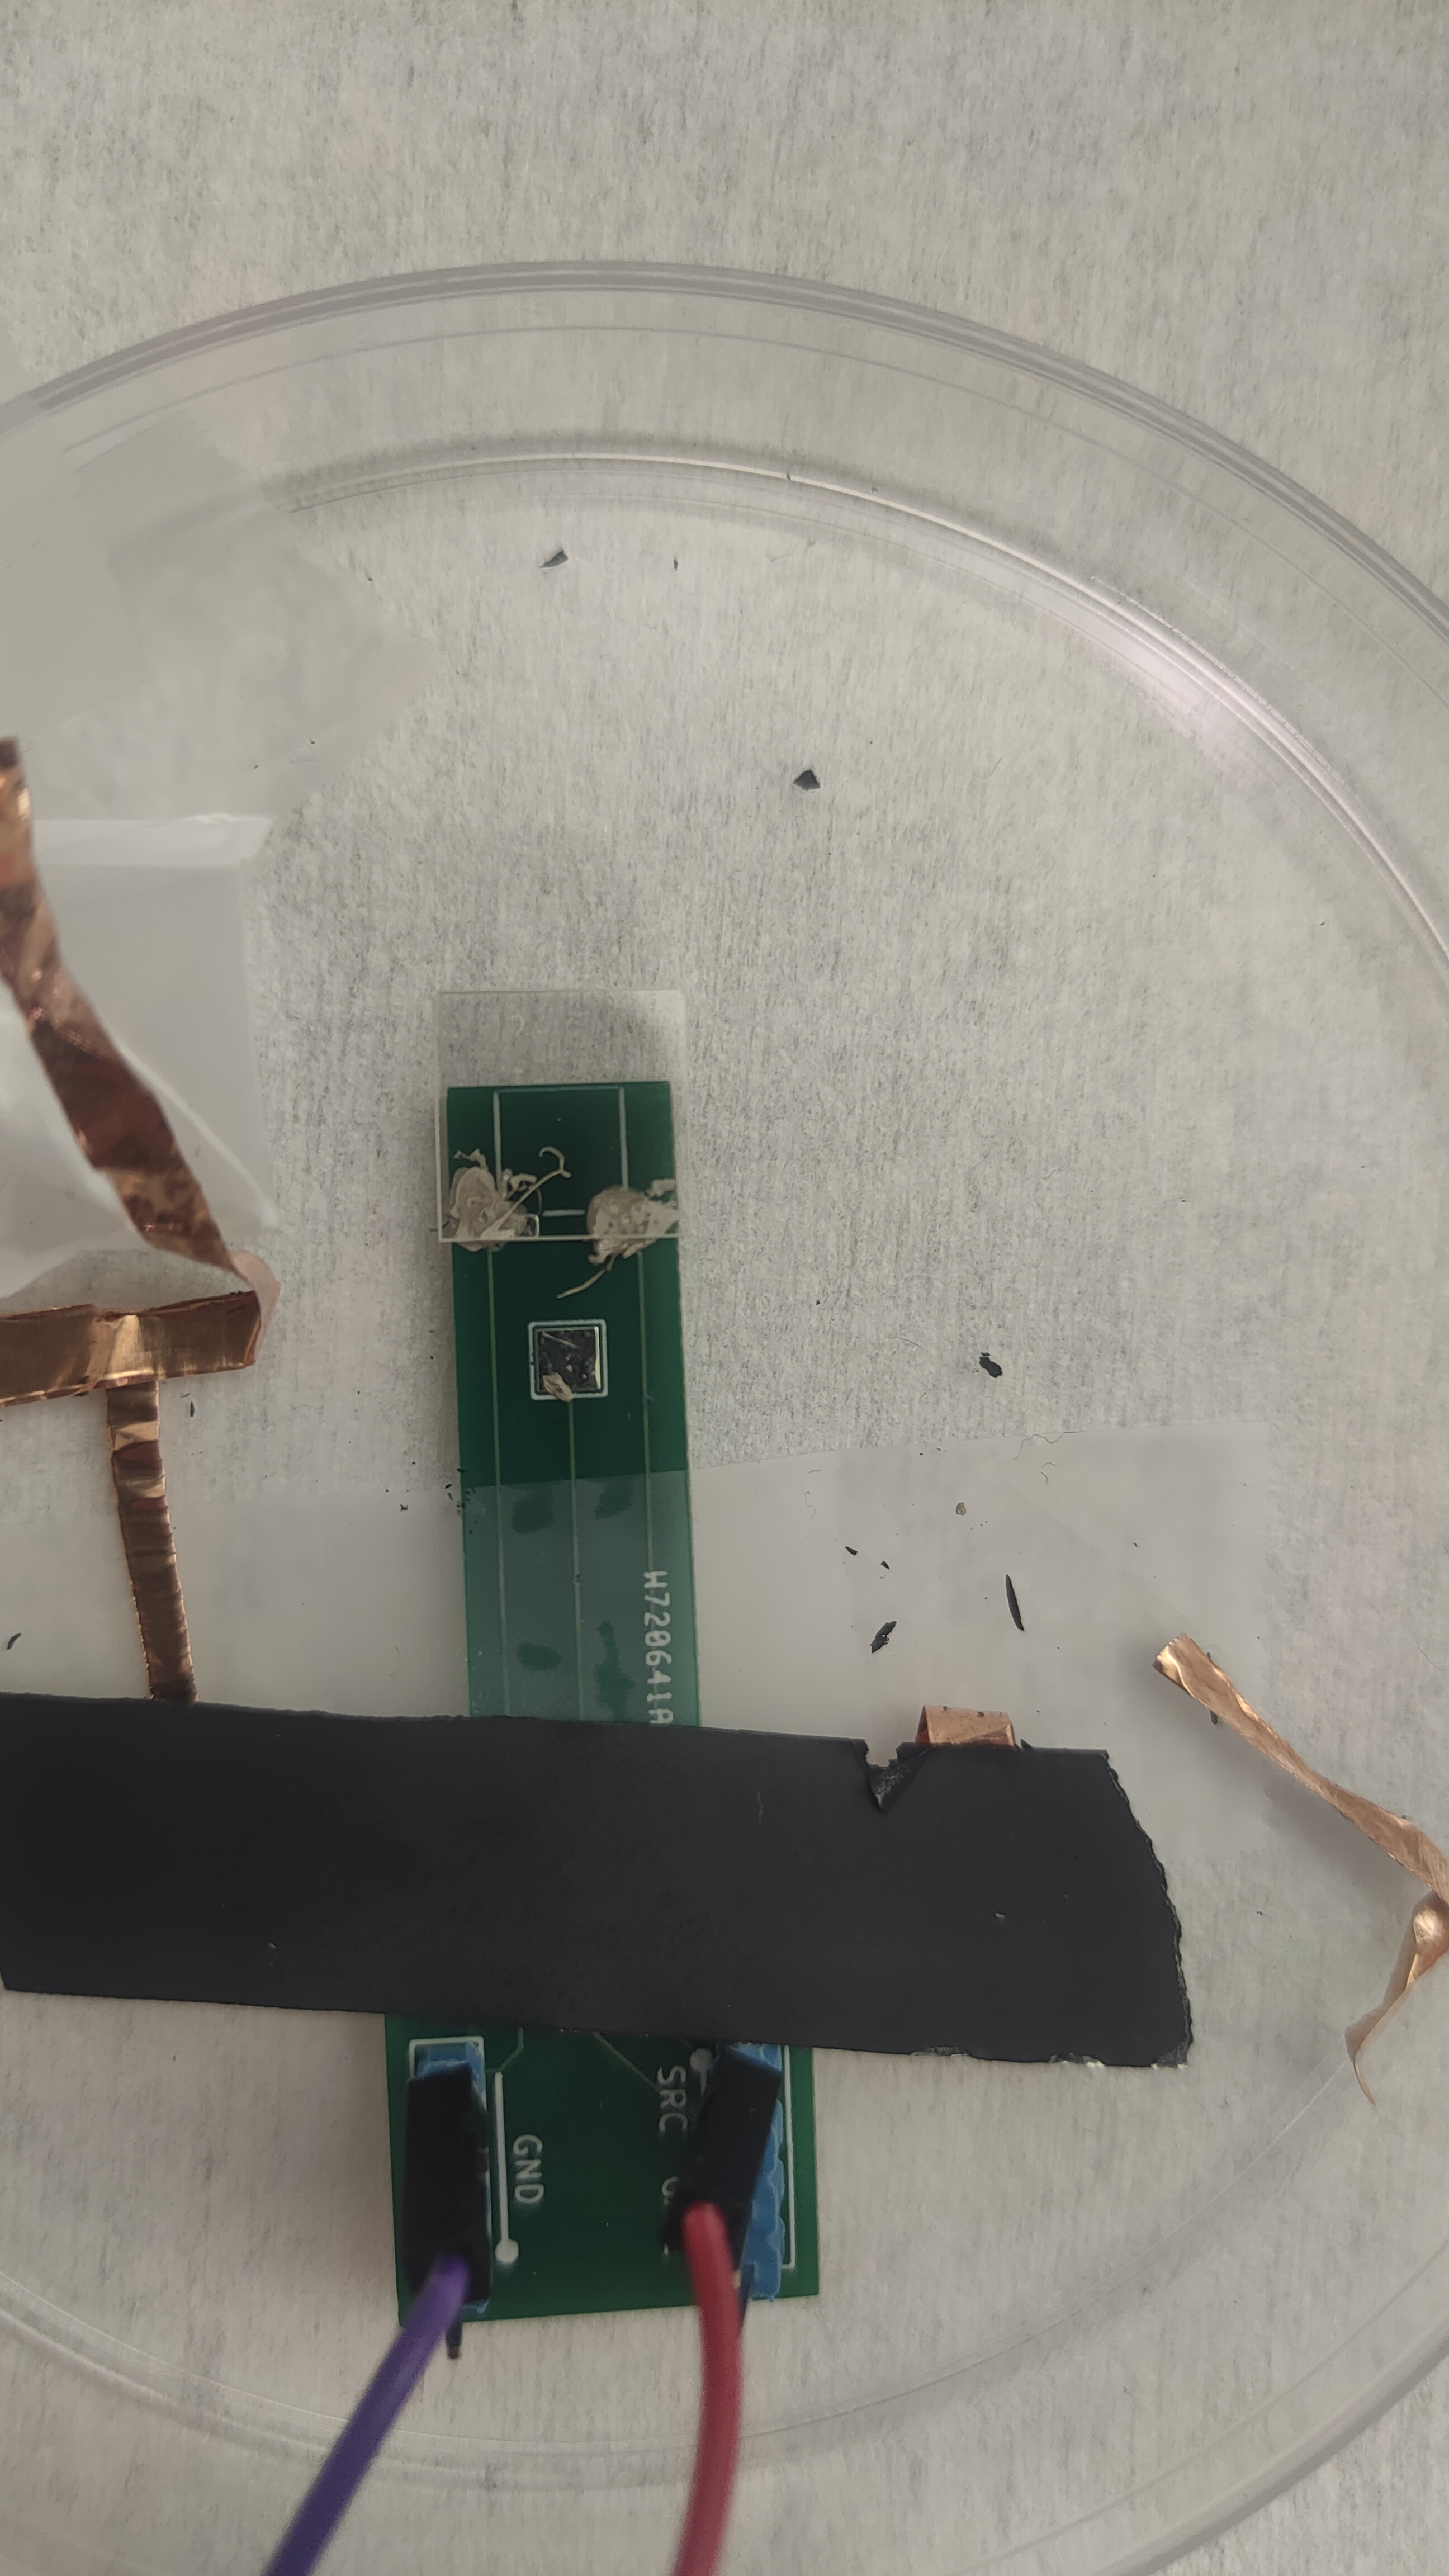

In [3]:
%cd "/content/gator/data/07-18/"

/content/gator/data/07-18


In [4]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [5]:
prep_csv('defbuffer1_0718_125801.csv')
df = pd.read_csv('defbuffer1_0718_125801.csv')


Fill Mode,1



In [6]:
df

Reading    Unit  Range Digits  Disp Digits Math Start Group  \
0      9.451737e-10  Amp DC  1.000000e-07          5.5    F           F   
1      8.738172e-10  Amp DC  1.000000e-08          5.5    F           F   
2      9.314973e-10  Amp DC  1.000000e-07          5.5    F           F   
3      8.694040e-10  Amp DC  1.000000e-08          5.5    F           F   
4      9.314417e-10  Amp DC  1.000000e-07          5.5    F           F   
...             ...     ...           ...          ...  ...         ...   
75815 -2.138434e-07  Amp DC  1.000000e-05          5.5    F           F   
75816 -2.137117e-07  Amp DC  1.000000e-05          5.5    F           F   
75817 -2.134857e-07  Amp DC  1.000000e-05          5.5    F           F   
75818 -2.131347e-07  Amp DC  1.000000e-05          5.5    F           F   
75819 -2.128387e-07  Amp DC  1.000000e-05          5.5    F           F   

      Limit1 High Limit1 Low Limit2 High Limit2 Low  ... Questionable Origin  \
0               F          F           F          F  ...            F   Main   
1               F          F           F          F  ...            F   Main   
2               F          F           F          F  ...            F   Main   
3               F          F           F          F  ...            F   Main   
4               F          F           F          F  ...            F   Main   
...           ...        ...         ...        ...  ...          ...    ...   
75815           F          F           F          F  ...            F   Main   
75816           F          F           F          F  ...            F   Main   
75817           F          F           F          F  ...            F   Main   
75818           F          F           F          F  ...            F   Main   
75819           F          F           F          F  ...            F   Main   

          Value   Unit.1 Digits  Output Sense Source Limit Overtemp  \
0      0.999989  Volt DC      1       T    2W            F        F   
1      0.993203  Volt DC      1       T    2W            F        F   
2      0.999990  Volt DC      1       T    2W            F        F   
3      0.993101  Volt DC      1       T    2W            F        F   
4      0.999991  Volt DC      1       T    2W            F        F   
...         ...      ...    ...     ...   ...          ...      ...   
75815  0.000019  Volt DC      1       F    2W            F        F   
75816  0.000019  Volt DC      1       F    2W            F        F   
75817  0.000019  Volt DC      1       F    2W            F        F   
75818  0.000018  Volt DC      1       F    2W            F        F   
75819  0.000019  Volt DC      1       F    2W            F        F   

      Relative Time  
0          0.000000  
1          0.191762  
2          0.600215  
3          0.791953  
4          1.200365  
...             ...  
75815   6267.320169  
75816   6268.108399  
75817   6268.896634  
75818   6269.684904  
75819   6270.473146  

[75820 rows x 21 columns]

In [7]:
# Time (s)
T = df['Relative Time']

# Current (nA)
I = df['Reading'] * 1e9

# Potential (mV)
V = df['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

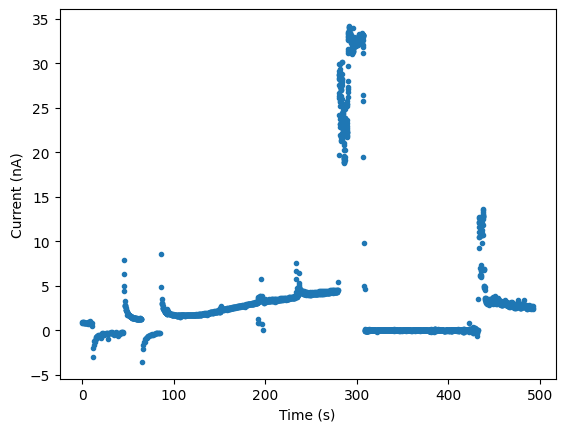

In [19]:
cut1 = 0
cut2 = 3000
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

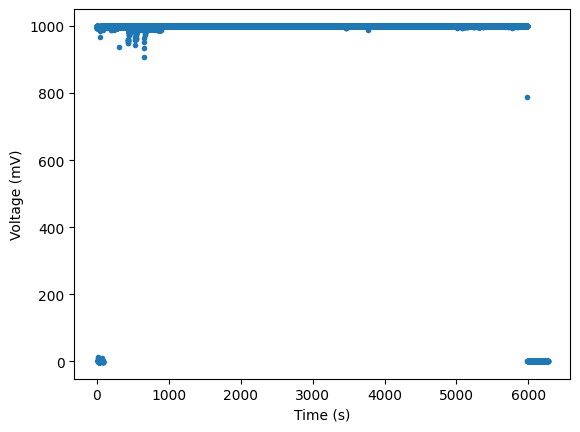

In [9]:
cut1 = 0
cut2 = None  # Set to None to include the entire array
plt.plot(T[cut1:cut2], V[cut1:cut2], '.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')
plt.show()

In [10]:
prep_csv('defbuffer1_0718_141014.csv')
df2 = pd.read_csv('defbuffer1_0718_141014.csv')

Fill Mode,1



In [11]:
df2

Reading    Unit  Range Digits  Disp Digits Math Start Group  \
0      9.451737e-10  Amp DC  1.000000e-07          5.5    F           F   
1      8.738172e-10  Amp DC  1.000000e-08          5.5    F           F   
2      9.314973e-10  Amp DC  1.000000e-07          5.5    F           F   
3      8.694040e-10  Amp DC  1.000000e-08          5.5    F           F   
4      9.314417e-10  Amp DC  1.000000e-07          5.5    F           F   
...             ...     ...           ...          ...  ...         ...   
81054 -1.688287e-08  Amp DC  1.000000e-06          5.5    F           F   
81055 -1.721903e-08  Amp DC  1.000000e-06          5.5    F           F   
81056 -1.679807e-08  Amp DC  1.000000e-06          5.5    F           F   
81057 -9.559542e-09  Amp DC  1.000000e-07          5.5    F           F   
81058 -1.743590e-08  Amp DC  1.000000e-06          5.5    F           F   

      Limit1 High Limit1 Low Limit2 High Limit2 Low  ... Questionable Origin  \
0               F          F           F          F  ...            F   Main   
1               F          F           F          F  ...            F   Main   
2               F          F           F          F  ...            F   Main   
3               F          F           F          F  ...            F   Main   
4               F          F           F          F  ...            F   Main   
...           ...        ...         ...        ...  ...          ...    ...   
81054           F          F           F          F  ...            F   Main   
81055           F          F           F          F  ...            F   Main   
81056           F          F           F          F  ...            F   Main   
81057           F          F           F          F  ...            F   Main   
81058           F          F           F          F  ...            F   Main   

          Value   Unit.1 Digits  Output Sense Source Limit Overtemp  \
0      0.999989  Volt DC      1       T    2W            F        F   
1      0.993203  Volt DC      1       T    2W            F        F   
2      0.999990  Volt DC      1       T    2W            F        F   
3      0.993101  Volt DC      1       T    2W            F        F   
4      0.999991  Volt DC      1       T    2W            F        F   
...         ...      ...    ...     ...   ...          ...      ...   
81054  0.000018  Volt DC      1       F    2W            F        F   
81055  0.000017  Volt DC      1       F    2W            F        F   
81056  0.000020  Volt DC      1       F    2W            F        F   
81057  0.040624  Volt DC      1       F    2W            F        F   
81058  0.000018  Volt DC      1       F    2W            F        F   

      Relative Time  
0          0.000000  
1          0.191762  
2          0.600215  
3          0.791953  
4          1.200365  
...             ...  
81054  10599.808911  
81055  10601.250726  
81056  10602.040126  
81057  10603.171585  
81058  10603.720519  

[81059 rows x 21 columns]

In [12]:
# Time (s)
T = df2['Relative Time']

# Current (mA)
I = df2['Reading'] * 1e9

# Potential (mV)
V = df2['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

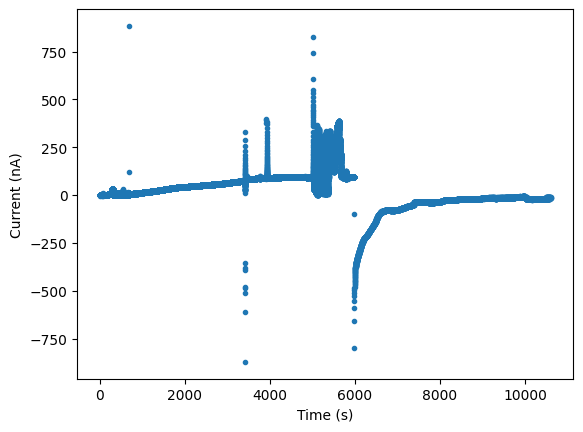

In [13]:

cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

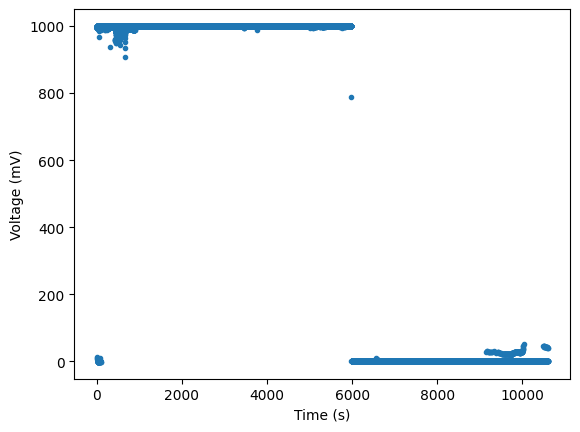

In [14]:
cut1 = 0
cut2 = None
plt.plot(T[cut1:cut2], V[cut1:cut2], '.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')
plt.show()

In [15]:
df_new = df[['Relative Time', 'Value', 'Reading']]
df_new.loc[:, 'Reading'] = df_new['Reading'] * 1e9
df_new.loc[:, 'Value'] = df_new['Value']
df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)

<ipython-input-15-db179bee8aa1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns={'Reading': 'Current (nA)', 'Value': 'Vds (1e-2 V)'}, inplace=True)


In [18]:
# prompt: generately plotly express scatter plots of current and voltage over time from df_new

# fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)", "Vds (1e-2 V)"])
fig = px.scatter(df_new, x="Relative Time", y=["Current (nA)"])
fig.show()

Increase in current but without a periodicity that might indicate the influence of gating from 700 to 5000.


Text(0.5, 0, 'Time (s)')

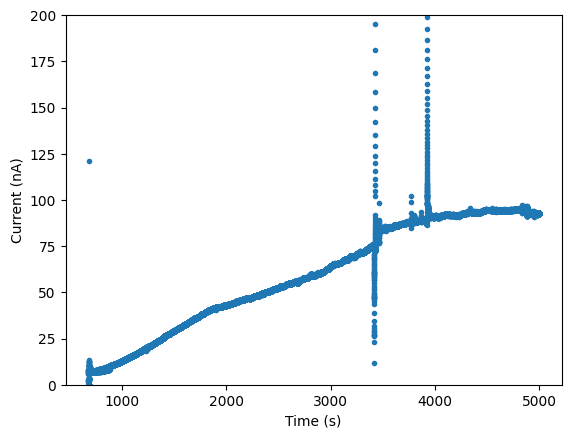

In [23]:
cut1 = 4000
cut2 = 64000
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylim(0,200)
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

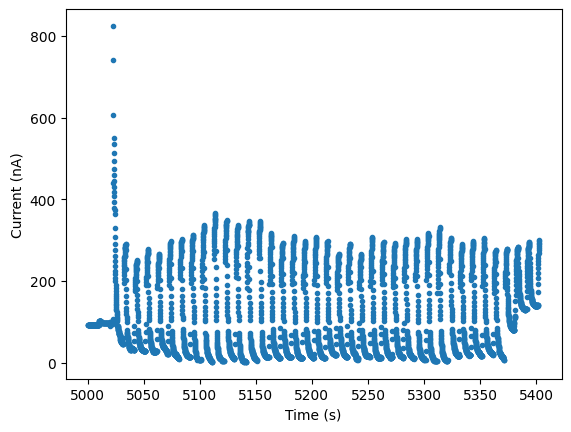

In [25]:
cut1 = 64000
cut2 = 69000
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')

plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

Periodicity (what changed ?)